In [2]:
import pandas as pd
import pprint

In [3]:
lyrics = pd.read_csv('../genius_lyrics21.csv')

Phrase Frequency

In [4]:
docs = lyrics['lyrics'].tolist() #list of Unicode strings

In [5]:
# Tokenize the documents.
from nltk.tokenize import RegexpTokenizer

# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()  # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

# Remove numbers, but not words that contain numbers.
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove words that are only one character.
docs = [[token for token in doc if len(token) > 1] for doc in docs]

#Removing stopwords:
from sklearn.feature_extraction import text
sw = ['oh','ooh','yeah','na','la','hey','like','da', 'feat',
      'whoa','uh','huh','doh','doo','ha','eh','ay','ayy','ll','re','ve','ft', 'yo',
     'mmm','nah','ah','woah'] #removing sounds, contractions and featured artists
stop_words= text.ENGLISH_STOP_WORDS.union(sw)

docs = [[token for token in doc if token not in stop_words] for doc in docs]

In [6]:
import nltk

In [7]:
# Lemmatize the documents.
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

In [10]:
# Compute bigrams.
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(docs, min_count=10)

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [11]:
bgs = pd.Series([x for x in [item for sublist in docs for item in sublist] if '_' in x])
bgs = pd.DataFrame(bgs.value_counts()).reset_index().rename(columns={'index':'phrase',0:'count'})
# bgs['phrase'] = bgs['phrase'].str.replace('_',' ')
bgs = bgs.sort_values('count', ascending=False).head(100)['phrase']
bgs

0            young_thug
1          young_stoner
2              kidd_keo
3               ody_ody
4             don_wanna
            ...        
89         taylor_swift
88           best_music
87          fn_dadealer
90    lil_baby_lil_baby
99                sí_sí
Name: phrase, Length: 100, dtype: object

In [12]:
cloudtext = ' '.join(bgs)

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

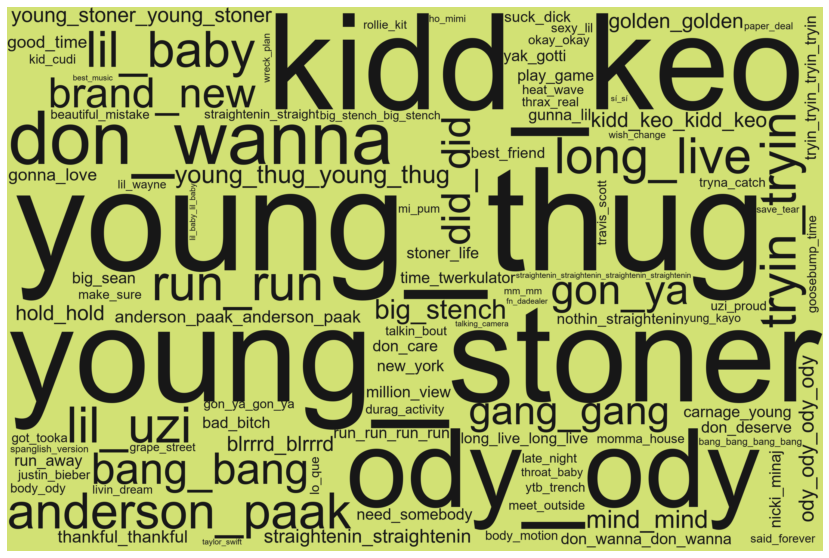

In [14]:
# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0, 0%, 9%)")
# set the wordcloud background color to white
# set max_words to 1000
# set width and height to higher quality, 3000 x 2000
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\Arial.ttf', background_color="#d2e174", width=3000, height=2000,relative_scaling=1).generate(cloudtext)
# set the word color to black
wordcloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")

plt.savefig('21_wc.png')


# Repetitiveness of a song

In [17]:
docs = lyrics['lyrics'].tolist() #list of Unicode strings

# Tokenize the documents.
from nltk.tokenize import RegexpTokenizer

# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()  # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

# Remove numbers, but not words that contain numbers.
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove words that are only one character.
docs = [[token for token in doc if len(token) > 1] for doc in docs]

docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs] #so i can do song repetitiveness

word_count = [len(docs[i]) for i in range(len(docs))]
unique_words = [len(set(docs[i])) for i in range(len(docs))]

repeat = pd.DataFrame()
repeat['word_count'] = pd.Series(word_count)
repeat['unique_words'] = pd.Series(unique_words)
repeat['lyrics'] = docs

repeat['percent_repeat'] = (repeat.unique_words/repeat.word_count)*100
# repeat[repeat.percent_repeat == repeat['percent_repeat'].max()]
# repeat['percent_repeat'].hist()

repeat.percent_repeat.median()

36.45569620253165

In [14]:
import plotly.express as px
fig = px.box(repeat, x="percent_repeat",points="all")

fig.update_traces(marker=dict(color='#afdfdd',opacity=0.7,line=dict(width=1,color='#181818')))




fig.show()
